In [1]:
import numpy as np
from PIL import Image

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision 
import torchvision.transforms as transforms

In [2]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In [3]:
train_data = torchvision.datasets.CIFAR10(root = './data', train=True, transform=transform, download=True)
test_data = torchvision.datasets.CIFAR10(root = './data', train=False, transform=transform, download=True)

train_loader = torch.utils.data.DataLoader(train_data, batch_size=32, shuffle=True, num_workers=2)
test_loader = torch.utils.data.DataLoader(train_data, batch_size=32, shuffle=True, num_workers=2)

Files already downloaded and verified
Files already downloaded and verified


In [4]:
image, label = train_data[0]

In [5]:
image 

tensor([[[-0.5373, -0.6627, -0.6078,  ...,  0.2392,  0.1922,  0.1608],
         [-0.8745, -1.0000, -0.8588,  ..., -0.0353, -0.0667, -0.0431],
         [-0.8039, -0.8745, -0.6157,  ..., -0.0745, -0.0588, -0.1451],
         ...,
         [ 0.6314,  0.5765,  0.5529,  ...,  0.2549, -0.5608, -0.5843],
         [ 0.4118,  0.3569,  0.4588,  ...,  0.4431, -0.2392, -0.3490],
         [ 0.3882,  0.3176,  0.4039,  ...,  0.6941,  0.1843, -0.0353]],

        [[-0.5137, -0.6392, -0.6235,  ...,  0.0353, -0.0196, -0.0275],
         [-0.8431, -1.0000, -0.9373,  ..., -0.3098, -0.3490, -0.3176],
         [-0.8118, -0.9451, -0.7882,  ..., -0.3412, -0.3412, -0.4275],
         ...,
         [ 0.3333,  0.2000,  0.2627,  ...,  0.0431, -0.7569, -0.7333],
         [ 0.0902, -0.0353,  0.1294,  ...,  0.1608, -0.5137, -0.5843],
         [ 0.1294,  0.0118,  0.1137,  ...,  0.4431, -0.0745, -0.2784]],

        [[-0.5059, -0.6471, -0.6627,  ..., -0.1529, -0.2000, -0.1922],
         [-0.8431, -1.0000, -1.0000,  ..., -0

In [6]:
image.size()

torch.Size([3, 32, 32])

In [7]:
class_names = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [8]:
class NeuralNet(nn.Module):

    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 12, 5)  
        self.pool = nn.MaxPool2d(2, 2)   
        self.conv2 = nn.Conv2d(12, 24, 5)  
        self.fc1 = nn.Linear(24 * 5 * 5, 120)  
        self.fc2 = nn.Linear(120, 84)  
        self.fc3 = nn.Linear(84, 10)   

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  
        x = self.pool(F.relu(self.conv2(x)))  
        x = torch.flatten(x, 1)              
        x = F.relu(self.fc1(x))              
        x = F.relu(self.fc2(x))              
        x = self.fc3(x)                      
        return x

In [9]:
net = NeuralNet()
loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

Epoch [1/30]
  Batch [100/1563]: Loss = 2.3015
  Batch [200/1563]: Loss = 2.3110
  Batch [300/1563]: Loss = 2.3072
  Batch [400/1563]: Loss = 2.3089
  Batch [500/1563]: Loss = 2.2972
  Batch [600/1563]: Loss = 2.2918
  Batch [700/1563]: Loss = 2.2905
  Batch [800/1563]: Loss = 2.2971
  Batch [900/1563]: Loss = 2.2789
  Batch [1000/1563]: Loss = 2.2602
  Batch [1100/1563]: Loss = 2.2531
  Batch [1200/1563]: Loss = 2.1986
  Batch [1300/1563]: Loss = 2.1784
  Batch [1400/1563]: Loss = 2.1200
  Batch [1500/1563]: Loss = 1.9928
Epoch [1/30] Loss: 2.2418

Epoch [2/30]
  Batch [100/1563]: Loss = 1.8096
  Batch [200/1563]: Loss = 2.0384
  Batch [300/1563]: Loss = 1.9021
  Batch [400/1563]: Loss = 1.9236
  Batch [500/1563]: Loss = 2.0727
  Batch [600/1563]: Loss = 1.8574
  Batch [700/1563]: Loss = 2.0560
  Batch [800/1563]: Loss = 1.7305
  Batch [900/1563]: Loss = 1.4971
  Batch [1000/1563]: Loss = 1.6810
  Batch [1100/1563]: Loss = 1.7784
  Batch [1200/1563]: Loss = 1.6091
  Batch [1300/1563]:

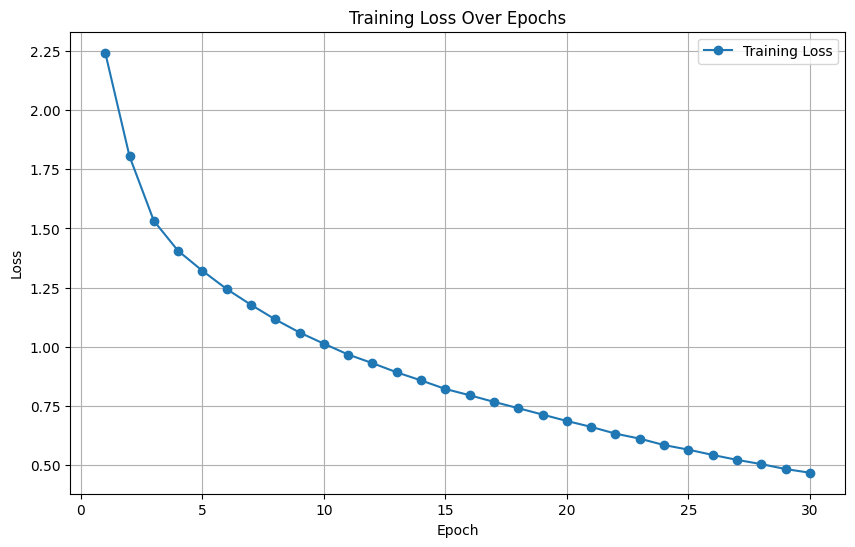

In [10]:
import matplotlib.pyplot as plt

device = torch.device("cpu")


net = net.to(device)

loss_history = []


for epoch in range(30):
    print(f'Epoch [{epoch + 1}/30]')
    
    running_loss = 0.0
    

    net.train()
    
    for i, (inputs, labels) in enumerate(train_loader, start=1):
        
        inputs, labels = inputs.to(device), labels.to(device)
        
        
        optimizer.zero_grad()
        
        
        outputs = net(inputs)
        
        
        loss = loss_function(outputs, labels)
        
        
        loss.backward()
        optimizer.step()
        
        
        running_loss += loss.item()
        
        
        if i % 100 == 0:
            print(f'  Batch [{i}/{len(train_loader)}]: Loss = {loss.item():.4f}')
    
    
    epoch_loss = running_loss / len(train_loader)
    print(f'Epoch [{epoch + 1}/30] Loss: {epoch_loss:.4f}\n')
    
    
    loss_history.append(epoch_loss)


plt.figure(figsize=(10, 6))
plt.plot(range(1, 31), loss_history, marker='o', label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.grid()
plt.show()


In [11]:
torch.save(net.state_dict(), 'trained_net.pth')

In [12]:
net = NeuralNet()
net.load_state_dict(torch.load('trained_net.pth'))

C:\Users\Admin\AppData\Local\Temp\ipykernel_2100\1690949604.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  net.load_state_dict(torch.load('trained_net.pth'))


<All keys matched successfully>

In [13]:
correct = 0
total = 0

net.eval()

with torch.no_grad():
    for data in train_loader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy: {accuracy}%')

Accuracy: 85.064%


In [17]:
new_transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))

])



def load_image(image_path):
    image = Image.open(image_path)
    image = new_transform(image)
    image = image.unsqueeze(0)
    return image

image_paths = ['example1.jpg', 'example2.jpg', 'example9.jpg', 'example10.jpg', 'example5.jpg', 'example6.jpg', 'example7.jpg', 'example8.jpg']
images = [load_image(img) for img in image_paths]

net.eval()
with torch.no_grad():
    for image in images:
        output = net(image)
        _, predicted = torch.max(output, 1)
        print(f'Prediction: {class_names[predicted.item()]}')



Prediction: dog
Prediction: plane
Prediction: cat
Prediction: car
Prediction: horse
Prediction: ship
Prediction: bird
Prediction: deer


In [18]:
with torch.no_grad():
    for i, image in enumerate(images):
        output = net(image)
        probabilities = torch.nn.functional.softmax(output, dim=1)
        _, predicted = torch.max(output, 1)
        print(f'Image {image_paths[i]} Prediction: {class_names[predicted.item()]}, Probabilities: {probabilities}')


Image example1.jpg Prediction: dog, Probabilities: tensor([[4.8246e-08, 9.0469e-10, 3.0676e-04, 2.4606e-04, 2.8382e-05, 9.9874e-01,
         8.6615e-08, 6.7974e-04, 8.1550e-09, 1.5954e-08]])
Image example2.jpg Prediction: plane, Probabilities: tensor([[9.9997e-01, 5.0314e-06, 3.1594e-07, 9.1318e-06, 1.3003e-09, 1.2458e-07,
         8.8075e-09, 4.0956e-09, 3.2376e-07, 1.4245e-05]])
Image example9.jpg Prediction: cat, Probabilities: tensor([[8.6410e-04, 2.7695e-06, 6.5430e-02, 7.4311e-01, 6.4929e-02, 1.0787e-01,
         8.5617e-03, 9.1913e-03, 2.0269e-05, 1.4392e-05]])
Image example10.jpg Prediction: car, Probabilities: tensor([[7.6403e-07, 9.9937e-01, 3.7775e-08, 2.3406e-06, 1.1844e-09, 2.3018e-06,
         1.4933e-06, 6.9469e-10, 1.6648e-07, 6.2776e-04]])
Image example5.jpg Prediction: horse, Probabilities: tensor([[1.2359e-09, 1.1675e-10, 3.9742e-07, 2.2846e-07, 4.3102e-04, 7.4344e-06,
         6.6230e-12, 9.9956e-01, 8.2540e-11, 2.4039e-09]])
Image example6.jpg Prediction: ship, Pro